<a href="https://colab.research.google.com/github/ArioZarrin/NLPContest/blob/main/Accuracy/NLPContest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLPContest

## Calculation of accuracy 

It's Majid Zarrin. After NLPCotest finished, the result was outstanding to predict the result of each candidates of Iran’s 12th Presidential Election among 41 million votes. there were 4 candidates. the prediction result was released as [38.49, 57.78, 2.56, 1.10] and the real result which came after was [38.28, 57.14, 1.16, 0.52]. The Mean Absolout Error was calculated as 0.7% which is super exciting, however although I am a good in mathematic but I could not calculated the accuracy as probability due to it was on 4'd space. 
some media published the accuracy as 99.3% ( 100 - .7) which was wrong but I was ok with that. 
couple of years after, when I learned to be a good data scientist. I found a really simple way. the algorithm name is Monte Carlo. 
the allgorithm can callculate area in 2'd space, volume in 3'd space and whatever it has called in n'd space by shooting ulimited( until convergence) points to that space and then counting whatever is inside and outside. 
please also don't forget that you should consider using **Uniform Distribution **for creating random points. 
for more clearation, here is an 2'd example for calculating the PI by Monte Carlo. 
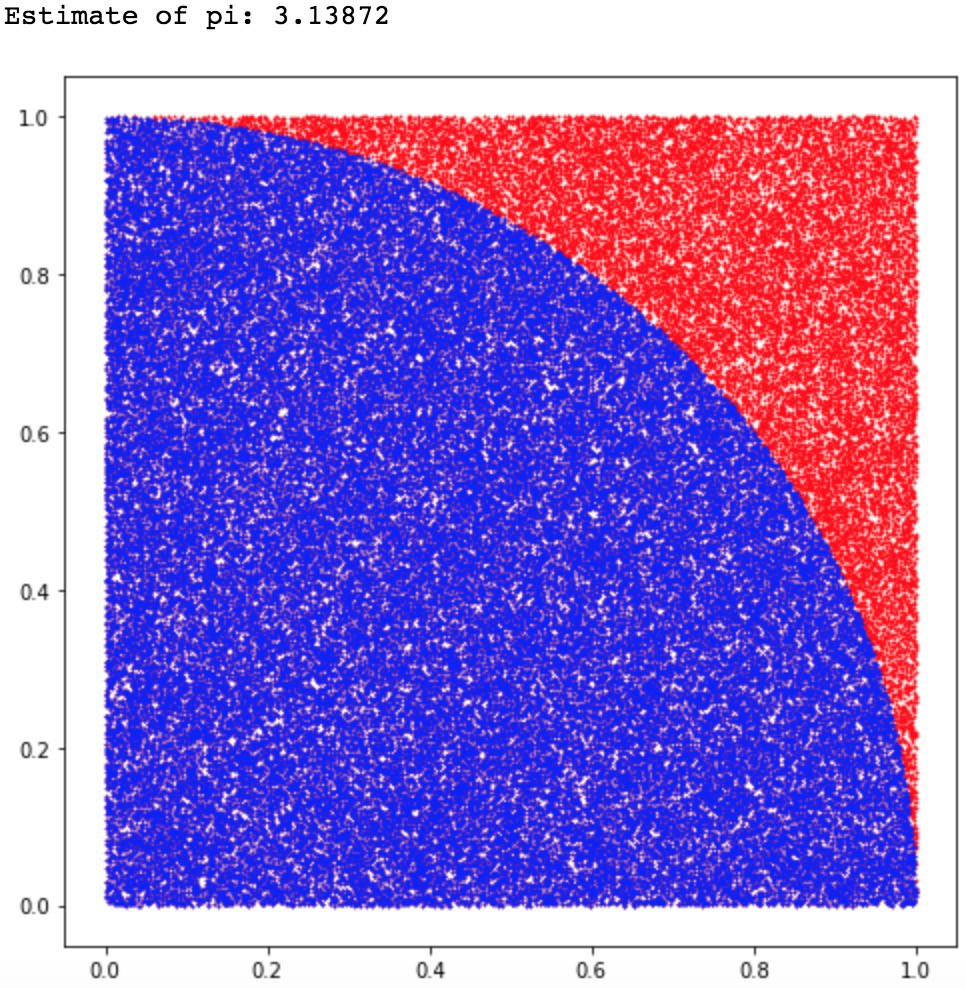

In [ ]:
 # NLPContest Accuracy By Monte Carlo
import math
import numpy as np
import pandas as pd

# 
total_iterate = 10_000_000
round_iterate = 100_000

names = pd.Series(['Raesi', 'Rouhani', 'Mirsalim', 'Hashemitaba'])
nlpcontest_prediction = pd.Series([38.49, 57.78, 2.56, 1.10])
election_result = pd.Series([38.28, 57.14, 1.16, 0.52])
election_result_normalized = (100 * election_result / election_result.sum()).round(2)


nlpcontest_df = pd.DataFrame({'Candidates': names, 'NLPContest':nlpcontest_prediction, 'Election':election_result,  'Election Normalized':election_result_normalized})
max_error = math.inf


def calculate_mae_error(serie1, serie2):
    err = (serie1 - serie2).abs().mean()
    return err

def random_votes_maker():
    # votes = np.random.random(4)
    votes = np.random.uniform(0,1,4)
    votes = 100 * votes / votes.sum()
    votes = votes.round(2)
    return votes


def calculate_probability_by_monte_carlo_method(nlpcontest_mae,size):

    best_sample_votes = {'votes': [], 'err':max_error}
    best_round_votes = {'votes': [], 'err':max_error}
    j = 0
    for i in range(1, size):
        sample_votes = random_votes_maker()
        sample_err = calculate_mae_error(sample_votes, election_result_normalized)

        if sample_err <= nlpcontest_mae:
            print('That\'s A Hit on index ', i,' sample error: ',sample_err,'sample vote: ',sample_votes)
            j += 1

        if sample_err < best_round_votes['err']:
            best_round_votes['votes'] = sample_votes
            best_round_votes['err'] = sample_err

        if sample_err < best_sample_votes['err']:
            best_sample_votes['votes'] = sample_votes
            best_sample_votes['err'] = sample_err


        if i % 100000 == 0:
            print('######################################################')
            print('#round:',int(i/round_iterate))
            print('best round vote:', best_round_votes['votes'])
            print('best round mean absolute error:', calculate_mae_error(best_round_votes['votes'], election_result_normalized))
            print('total hits till now:', j)
            print('probability till now:', (100 * (i - j) / i),'%')
            print('######################################################')
            best_round_votes = {'votes': [], 'err':max_error}



    final_result = (100 * (i - j) / i)

    return final_result, best_sample_votes


nlpcontest_mae = calculate_mae_error(nlpcontest_prediction,election_result)
nlpcontest_mae_normalized = calculate_mae_error(nlpcontest_prediction,election_result_normalized)

print(nlpcontest_df)
print('nlpcontest_mae:',nlpcontest_mae )
print('nlpcontest_mae_normalized:',nlpcontest_mae_normalized )
print()

final_result ,  best_sample_votes = calculate_probability_by_monte_carlo_method(nlpcontest_mae,total_iterate )
print()
print('Best sample vote:',best_sample_votes['votes'])
print('Mean absolute error :',best_sample_votes['err'])
print('Final Result :',final_result)

    Candidates  NLPContest  Election  Election Normalized
0        Raesi       38.49     38.28                39.42
1      Rouhani       57.78     57.14                58.85
2     Mirsalim        2.56      1.16                 1.19
3  Hashemitaba        1.10      0.52                 0.54
nlpcontest_mae: 0.7075000000000005
nlpcontest_mae_normalized: 0.9825

That's A Hit on index  20725  sample error:  0.5350000000000001 sample vote:  [38.85 58.35  1.55  1.25]
That's A Hit on index  65492  sample error:  0.6774999999999998 sample vote:  [4.031e+01 5.932e+01 3.500e-01 3.000e-02]
######################################################
#round: 1
best round vote: [38.85 58.35  1.55  1.25]
best round mean absolute error: 0.5350000000000001
total hits till now: 2
probability till now: 99.998 %
######################################################
######################################################
#round: 2
best round vote: [37.95 57.95  1.62  2.48]
best round mean absolute error: 1.184999

By calculating Mont Calrlo on 10 million shoots just 162 hits has better prediction that our prediction. so the final acuracy is **99.9983%** ( 1-162/10m ). 
